In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"kurVerileri.csv", parse_dates=["Zaman"], index_col="Zaman")
# parse_dates --> zaman sutunundaki veriler datetime veri tipinde gelsin diye. Bunu yazmazsak string olarak gelir.
# index_col   --> veri zaman sutununa gore indexlensin. 

In [3]:
df.head() # Ilk 5 verinin gosterilmesi

,Ceyrek,Dolar,Euro
Zaman,,,
2019-05-23 02:06:40.385366,408.48,6.1010,6.8228
2019-05-23 02:07:40.659732,408.53,6.1006,6.8227
2019-05-23 02:08:40.807732,408.53,6.1007,6.8211
2019-05-23 02:09:40.941482,408.58,6.1009,6.8226
2019-05-23 02:10:41.073235,408.58,6.1005,6.8223


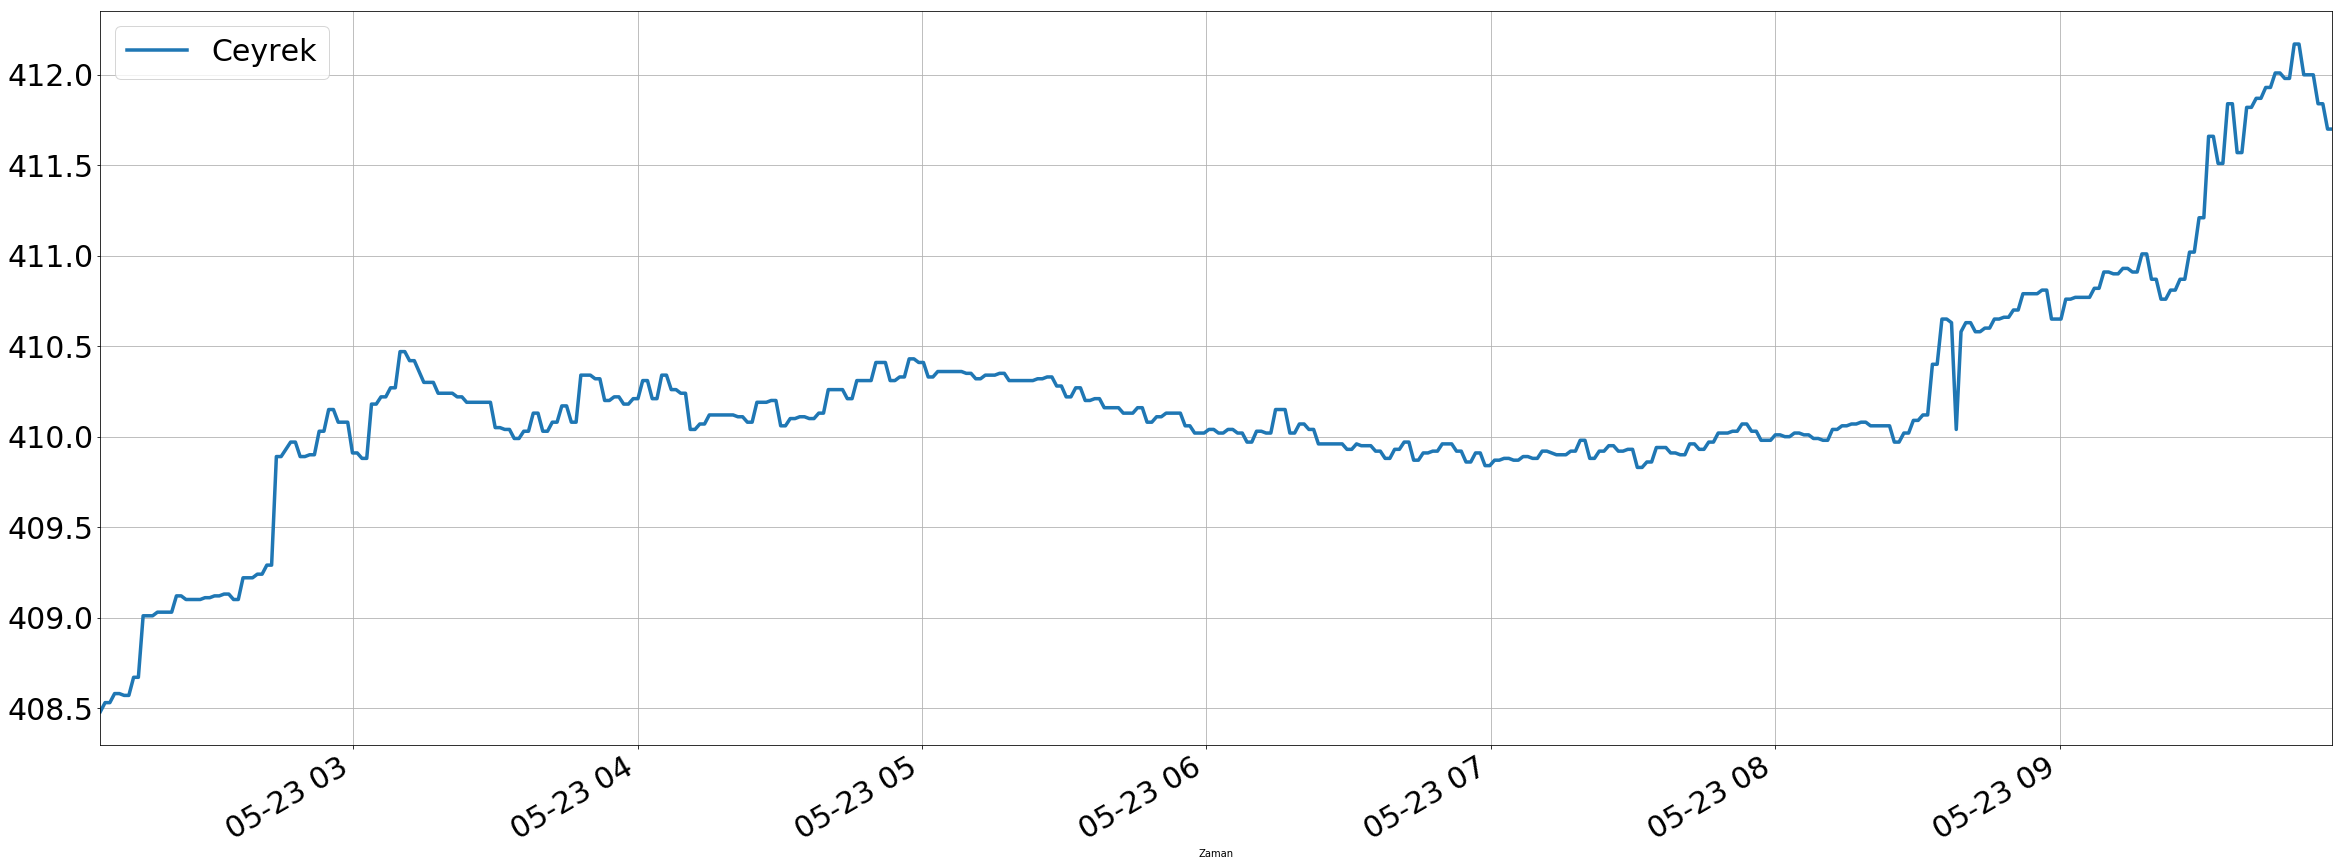

In [4]:
# Tum ceyrek altin kuru verisinin grafik uzerinde gosterilmesi
df.Ceyrek.plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});
# Legend size     = https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
# Grafik ayarlari = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

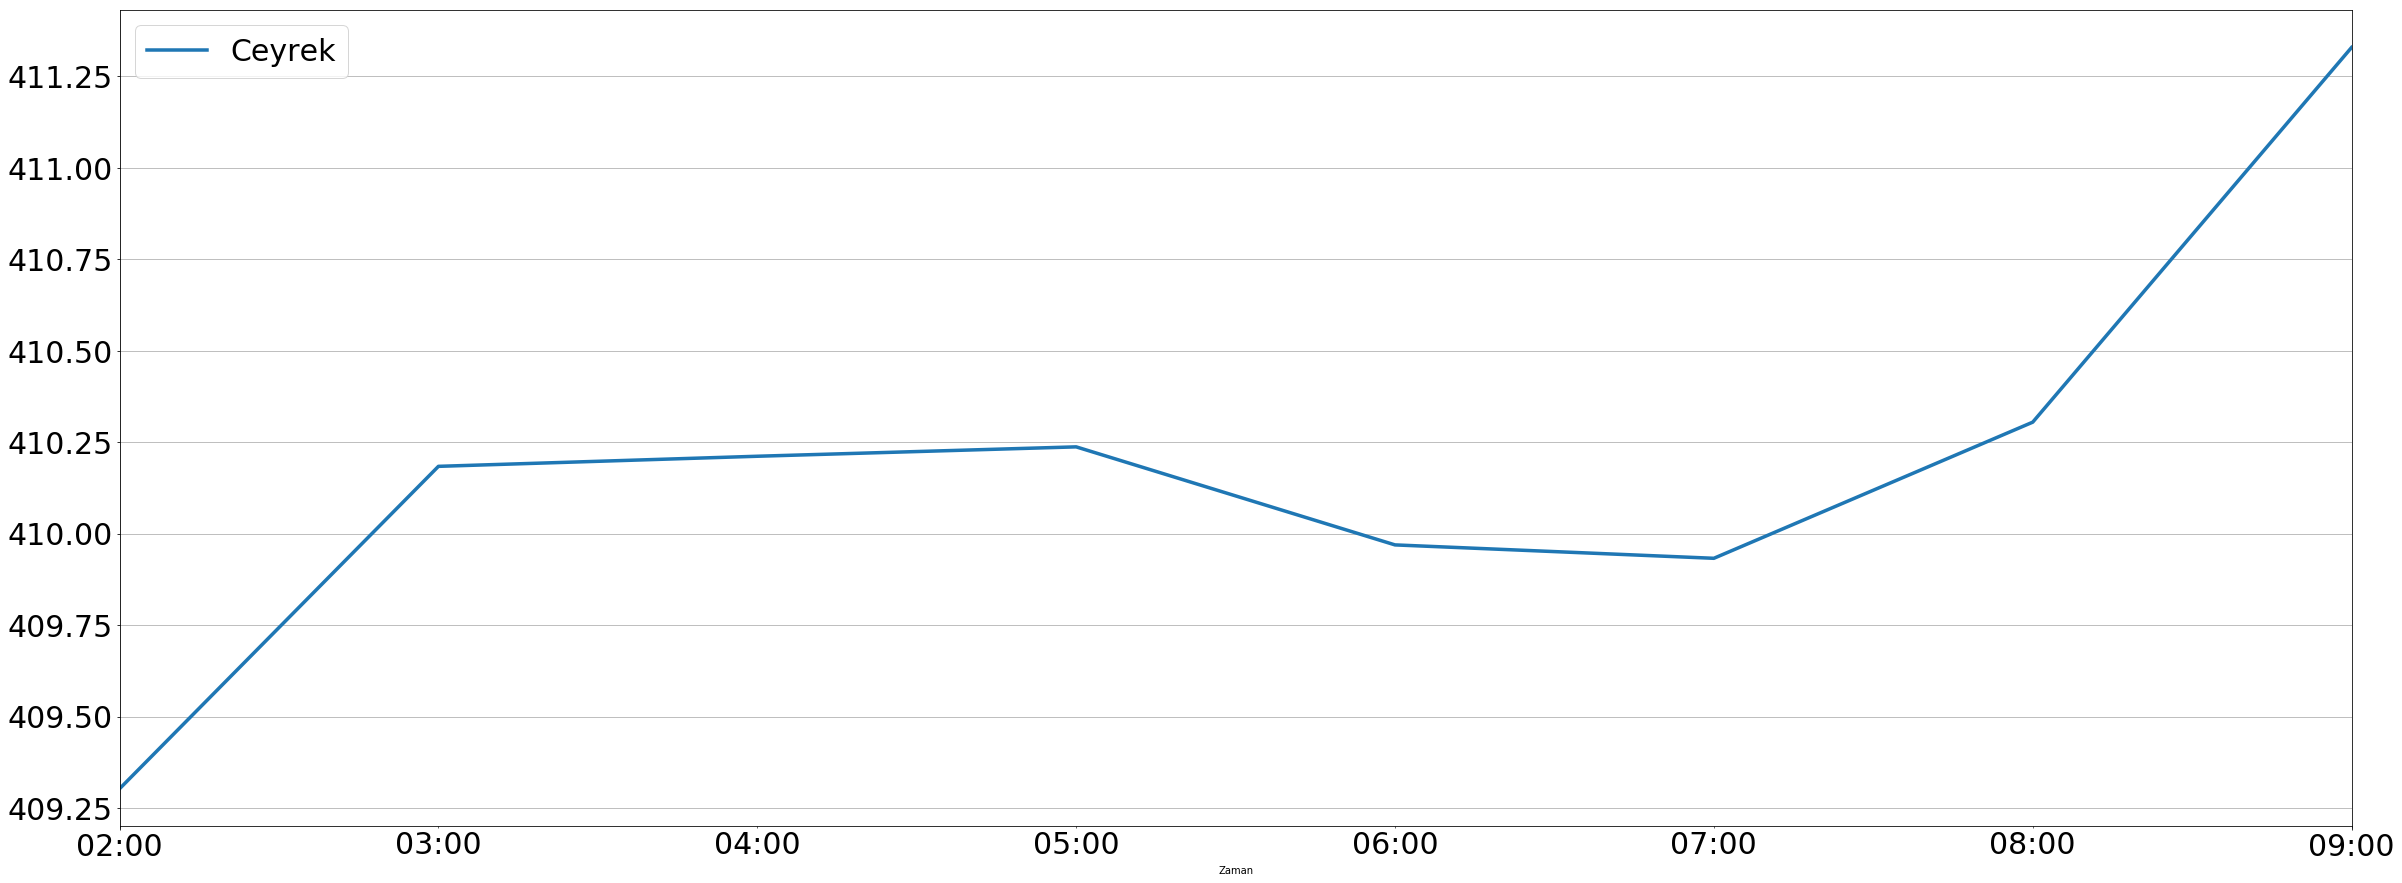

In [5]:
# Ceyrek altin kur verisinin saatlik ortalamasina gore grafik cizdirilmesi
df.Ceyrek.resample('H').mean().plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});

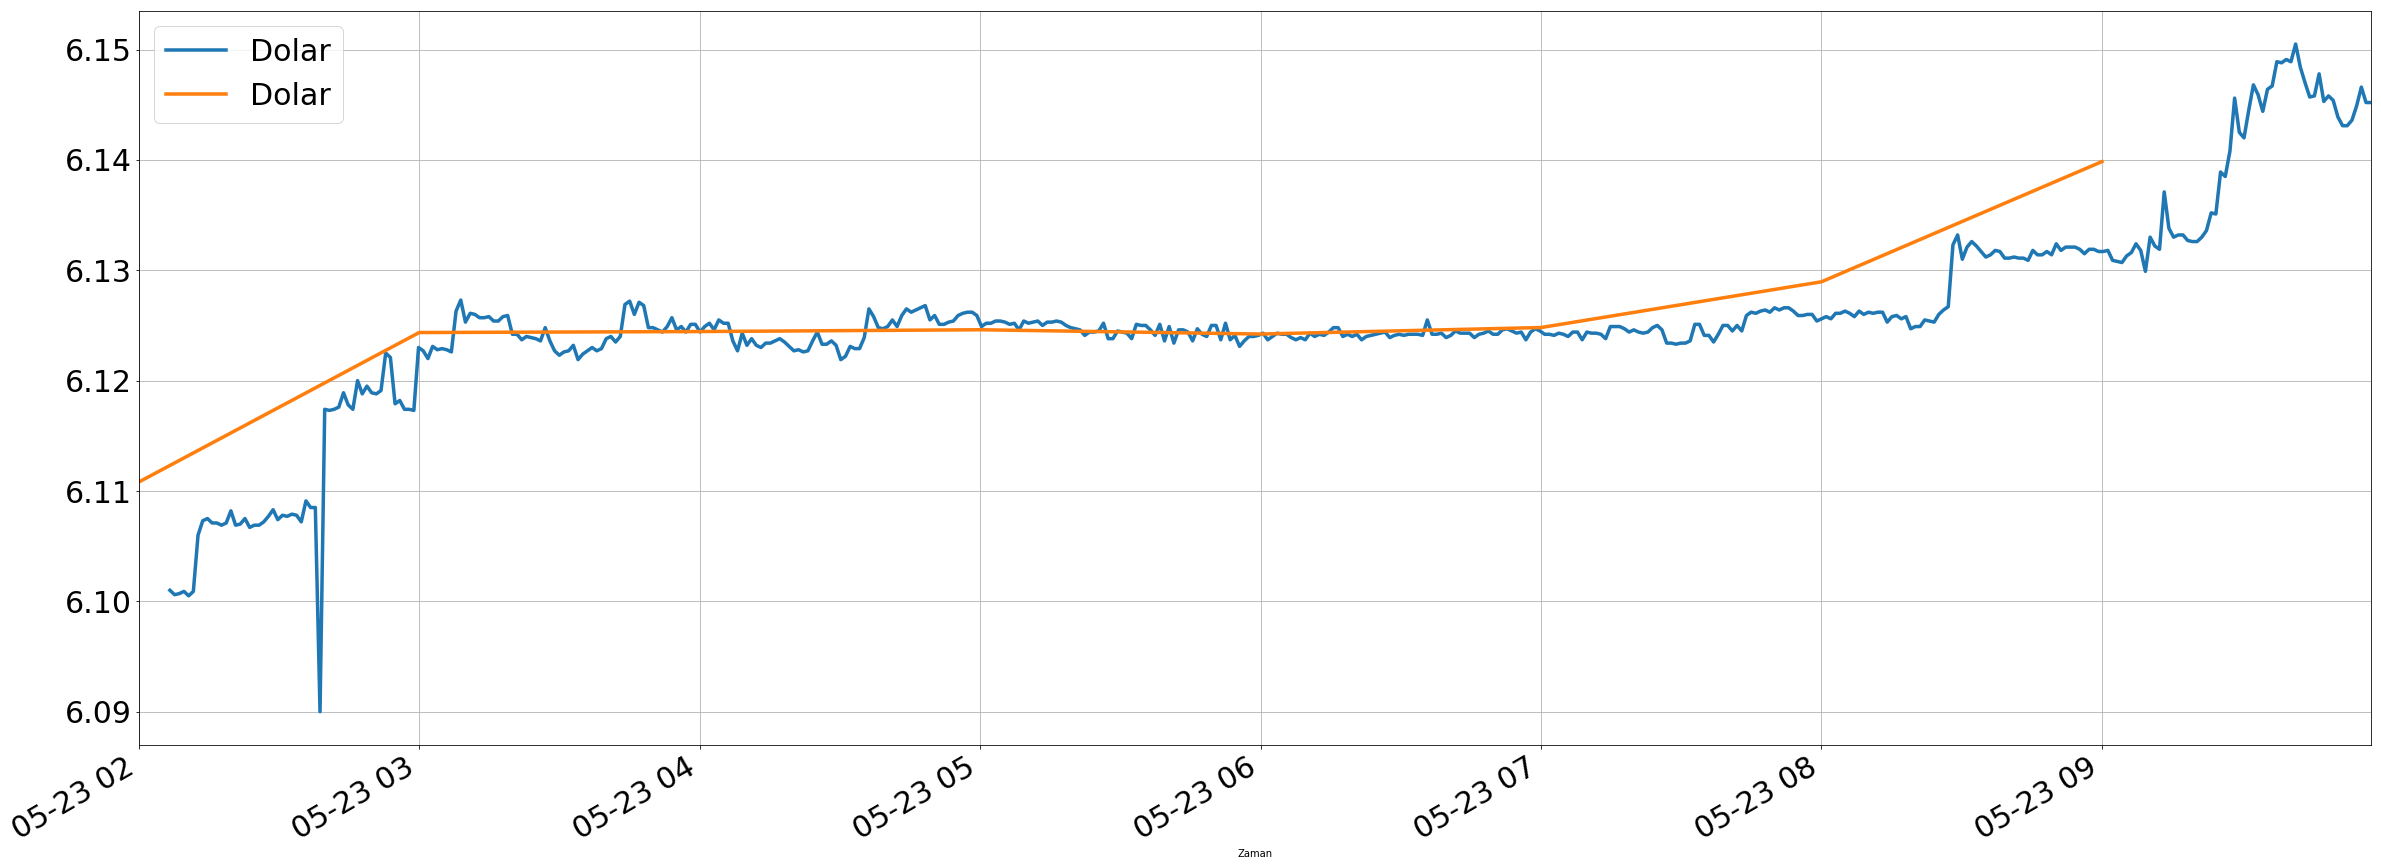

In [6]:
df.Dolar.plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});
df.Dolar.resample('H').mean().plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});

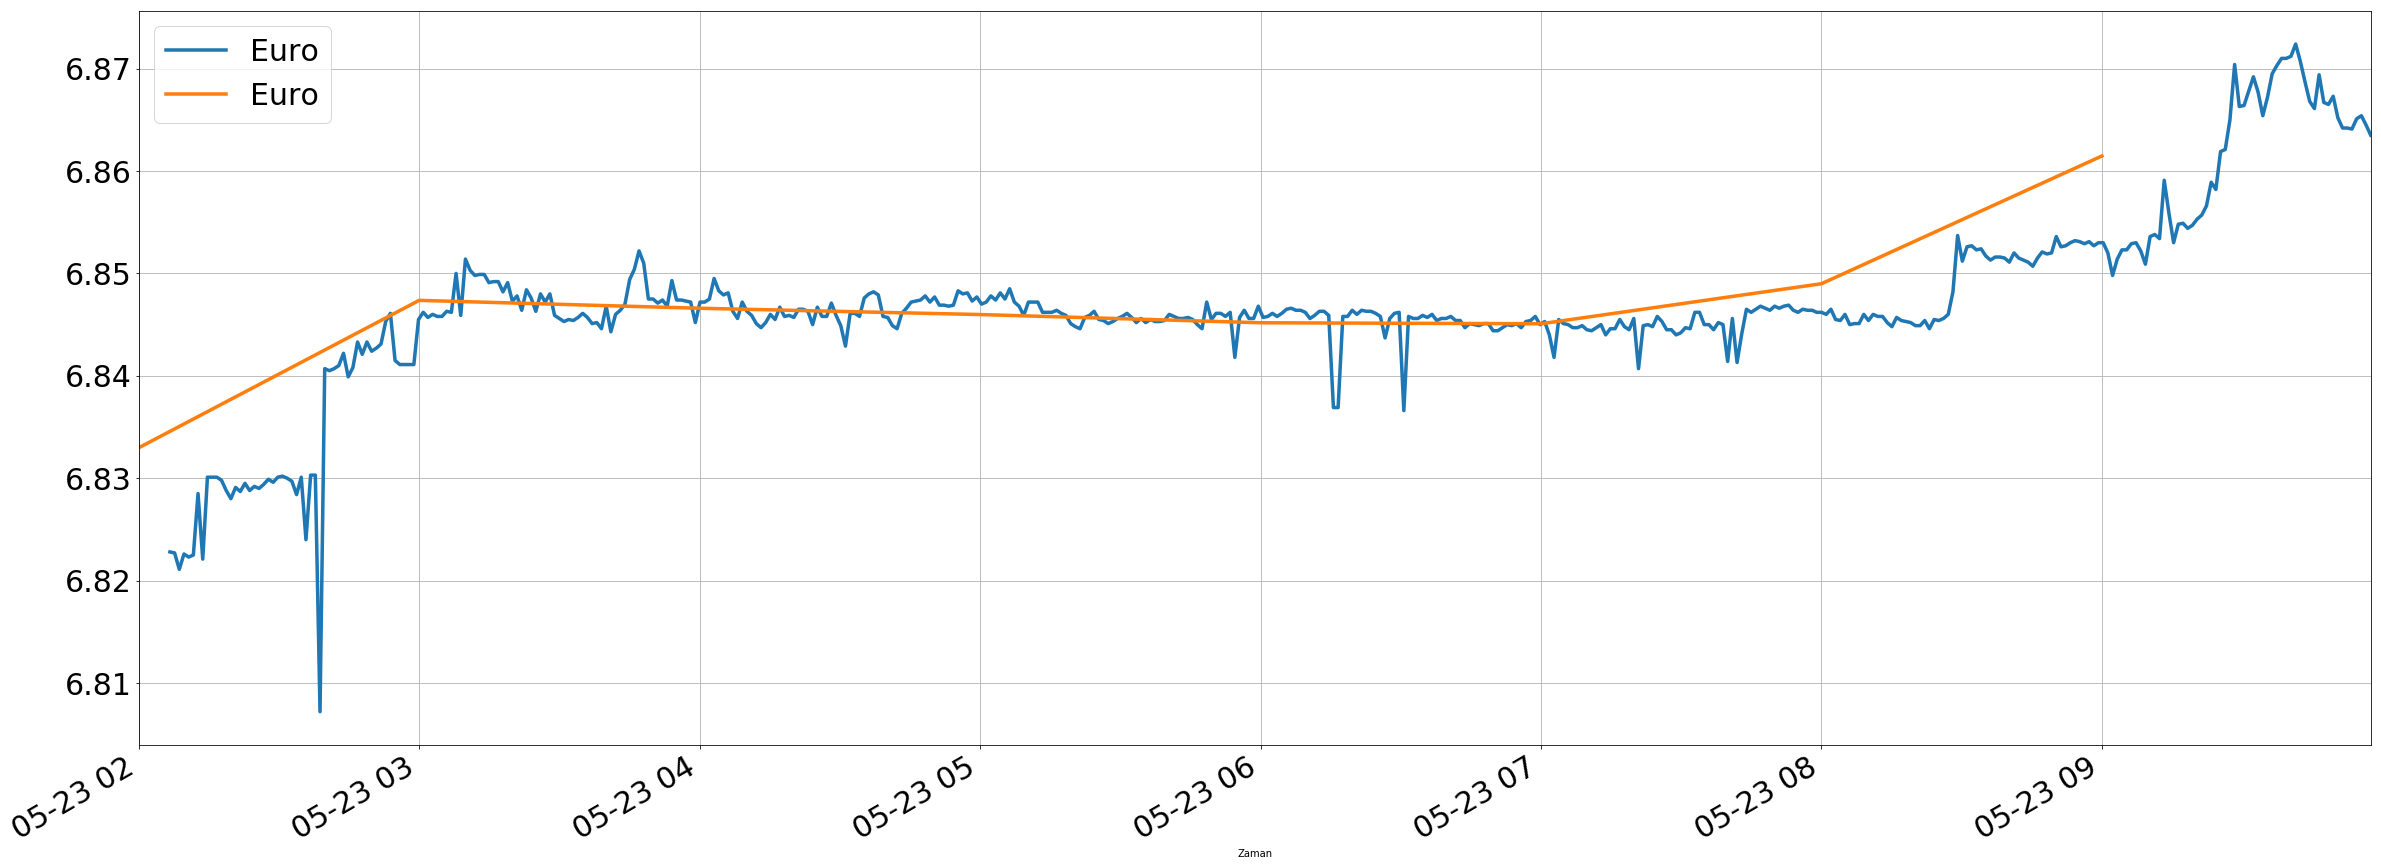

In [7]:
df.Euro.plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});
df.Euro.resample('H').mean().plot(figsize=(40,15),legend=True,fontsize=30,grid=True,linewidth=3.5).legend(loc=2,prop={"size":30});

### Ceyrek Altin Fiyat Tahminleme Linear Regression
Yaralandigim videoya gitmak icin [tiklayin.](https://www.youtube.com/watch?v=OwnaUVt6VVE&list=PLtQQKsdL7EPxd2nkEJmVkq0HCdEBER6OL)

Kodlara gitmek icin [tiklayin.](https://nbviewer.jupyter.org/github/mGalarnyk/Python_Tutorials/blob/master/Time_Series/Part1_Time_Series_Data_BasicPlotting.ipynb)

Lineer Regression ile fiyat tahminleme yaptim. Sonuc oldukca kotu, denemis oldum.

In [8]:
df["Dakika"] = range(1,len(df.index.values)+1) # Dakika kolunu eklemek icin
df.head()

,Ceyrek,Dolar,Euro,Dakika
Zaman,,,,
2019-05-23 02:06:40.385366,408.48,6.1010,6.8228,1
2019-05-23 02:07:40.659732,408.53,6.1006,6.8227,2
2019-05-23 02:08:40.807732,408.53,6.1007,6.8211,3
2019-05-23 02:09:40.941482,408.58,6.1009,6.8226,4
2019-05-23 02:10:41.073235,408.58,6.1005,6.8223,5


In [9]:
df = df.reset_index()
df.head(5)

,Zaman,Ceyrek,Dolar,Euro,Dakika
0,2019-05-23 02:06:40.385366,408.48,6.1010,6.8228,1
1,2019-05-23 02:07:40.659732,408.53,6.1006,6.8227,2
2,2019-05-23 02:08:40.807732,408.53,6.1007,6.8211,3
3,2019-05-23 02:09:40.941482,408.58,6.1009,6.8226,4
4,2019-05-23 02:10:41.073235,408.58,6.1005,6.8223,5


In [10]:
df['Ceyrek_Rolling_Mean'] = df['Ceyrek'].rolling(window = 30).mean() # 30 rolling mean
df['Dolar_Rolling_Mean'] = df['Dolar'].rolling(window = 30).mean() # 30 rolling mean
df['Euro_Rolling_Mean'] = df['Euro'].rolling(window = 30).mean() # 30 rolling mean

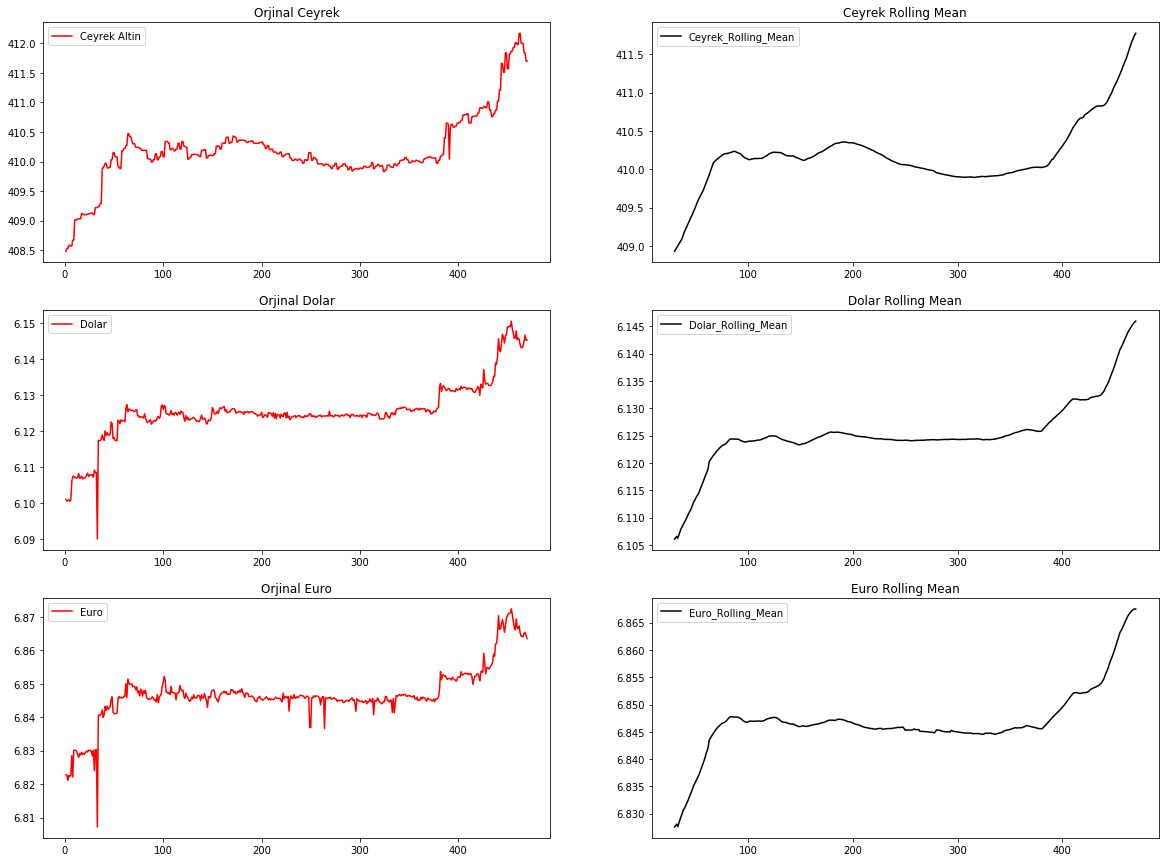

In [11]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15));
axes[0][0].plot('Dakika', 'Ceyrek', data = df, label="Ceyrek Altin",color = (1,0,0));
axes[0][0].set_title('Orjinal Ceyrek');
axes[0][0].legend(loc=2);
axes[0][1].plot('Dakika', 'Ceyrek_Rolling_Mean', data = df,color = (0,0,0));
axes[0][1].set_title('Ceyrek Rolling Mean');
axes[0][1].legend(loc=2);

axes[1][0].plot('Dakika', 'Dolar', data = df, label="Dolar",color = (1,0,0));
axes[1][0].set_title('Orjinal Dolar');
axes[1][0].legend(loc=2);
axes[1][1].plot('Dakika', 'Dolar_Rolling_Mean', data = df,color = (0,0,0));
axes[1][1].set_title('Dolar Rolling Mean');
axes[1][1].legend(loc=2);

axes[2][0].plot('Dakika', 'Euro', data = df, label="Euro",color = (1,0,0));
axes[2][0].set_title('Orjinal Euro');
axes[2][0].legend(loc=2);
axes[2][1].plot('Dakika', 'Euro_Rolling_Mean', data = df,color = (0,0,0));
axes[2][1].set_title('Euro Rolling Mean');
axes[2][1].legend(loc=2);

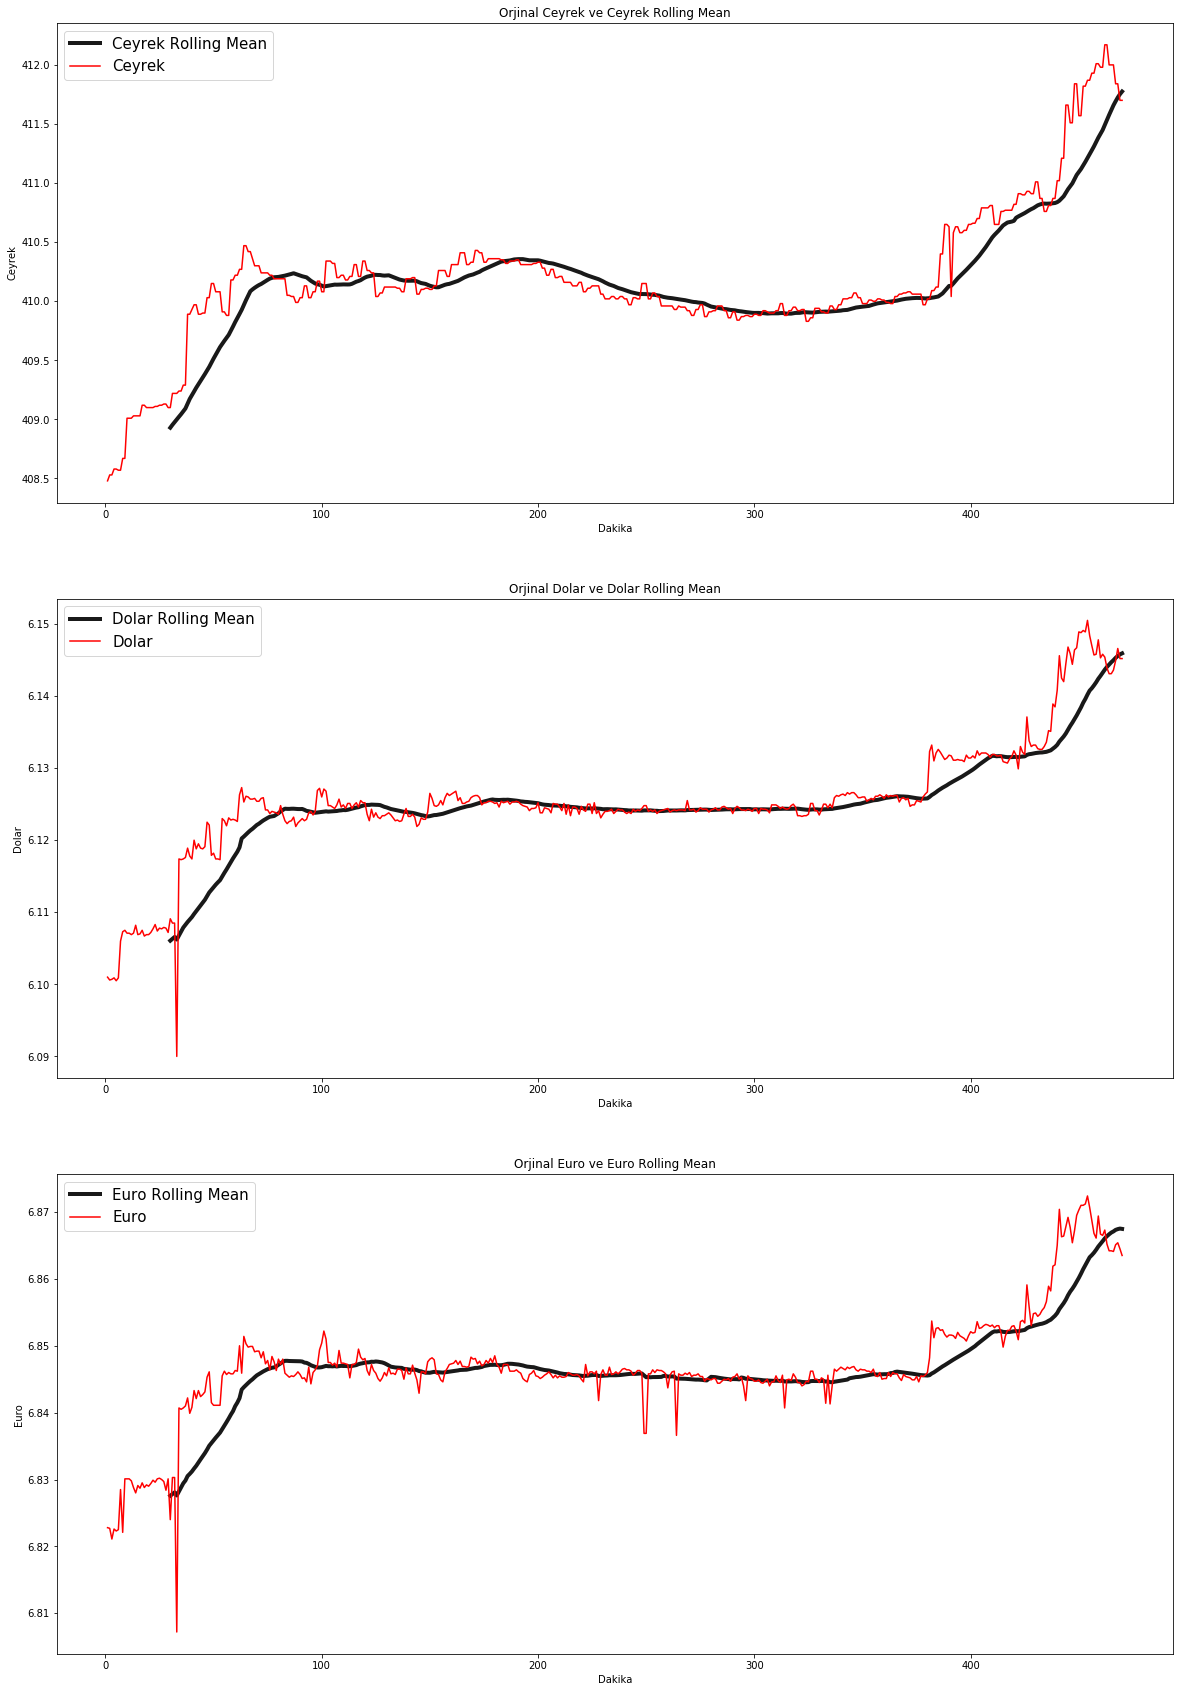

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,30));
axes[0].plot(df['Dakika'], df['Ceyrek_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Ceyrek Rolling Mean');
axes[0].plot(df['Dakika'], df['Ceyrek'], color = (1,0,0), label = 'Ceyrek');
axes[0].set_title('Orjinal Ceyrek ve Ceyrek Rolling Mean')
axes[0].set_xlabel('Dakika')
axes[0].set_ylabel('Ceyrek')
axes[0].legend(loc=2,fontsize=15);

axes[1].plot(df['Dakika'], df['Dolar_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Dolar Rolling Mean');
axes[1].plot(df['Dakika'], df['Dolar'], color = (1,0,0), label = 'Dolar');
axes[1].set_title('Orjinal Dolar ve Dolar Rolling Mean')
axes[1].set_xlabel('Dakika')
axes[1].set_ylabel('Dolar')
axes[1].legend(loc=2,fontsize=15);

axes[2].plot(df['Dakika'], df['Euro_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Euro Rolling Mean');
axes[2].plot(df['Dakika'], df['Euro'], color = (1,0,0), label = 'Euro');
axes[2].set_title('Orjinal Euro ve Euro Rolling Mean')
axes[2].set_xlabel('Dakika')
axes[2].set_ylabel('Euro')
axes[2].legend(loc=2,fontsize=15);

In [13]:
fdf = df[df['Dakika'] >= 30] # Nan degerleri almiyoruz
fdf.head(5)

,Zaman,Ceyrek,Dolar,Euro,Dakika,Ceyrek_Rolling_Mean,Dolar_Rolling_Mean,Euro_Rolling_Mean
29,2019-05-23 02:35:46.603856,409.10,6.1091,6.8240,30,408.929667,6.106060,6.827573
30,2019-05-23 02:36:46.743808,409.22,6.1085,6.8303,31,408.954333,6.106310,6.827823
31,2019-05-23 02:37:46.998250,409.22,6.1085,6.8303,32,408.977333,6.106573,6.828077
32,2019-05-23 02:38:47.207756,409.22,6.0900,6.8072,33,409.000333,6.106217,6.827613
33,2019-05-23 02:39:47.367278,409.24,6.1174,6.8407,34,409.022333,6.106767,6.828217


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
modelCeyrek = LinearRegression().fit(fdf[['Dakika']], fdf[['Ceyrek_Rolling_Mean']])
mC = modelCeyrek.coef_[0]
bC = modelCeyrek.intercept_
print('y = ', mC[0], 'x + ', bC[0])  # Model Denklemi olusturdu

ceyrekTahmin = modelCeyrek.predict(fdf[['Dakika']]) # Denkleme gore tahminler
ceyrekTahmin[0:5]

y =  0.0018880847910260309 x +  409.7086356427573


array([[409.76527819],
       [409.76716627],
       [409.76905436],
       [409.77094244],
       [409.77283053]])

In [16]:
modelDolar = LinearRegression().fit(fdf[['Dakika']], fdf[['Dolar_Rolling_Mean']])
mD = modelDolar.coef_[0]
bD = modelDolar.intercept_
print('y = ', mD[0], 'x + ', bD[0])  # Model Denklemi olusturdu

dolarTahmin = modelDolar.predict(fdf[['Dakika']]) # Denkleme gore tahminler
dolarTahmin[0:5]

y =  3.5911491869476534e-05 x +  6.116408959988037


array([[6.1174863 ],
       [6.11752222],
       [6.11755813],
       [6.11759404],
       [6.11762995]])

In [17]:
modelEuro = LinearRegression().fit(fdf[['Dakika']], fdf[['Euro_Rolling_Mean']])
mE = modelEuro.coef_[0]
bE = modelEuro.intercept_
print('y = ', mE[0], 'x + ', bE[0])  # Model Denklemi olusturdu

euroTahmin = modelEuro.predict(fdf[['Dakika']]) # Denkleme gore tahminler
euroTahmin[0:5]

y =  3.0175778469899683e-05 x +  6.839296176319788


array([[6.84020145],
       [6.84023163],
       [6.8402618 ],
       [6.84029198],
       [6.84032215]])

In [18]:
ceyrekTahminDF = pd.DataFrame(data = ceyrekTahmin, index = fdf.index.values, columns = ['Ceyrek_Tahmin']) 
# Tahmin tablosu olusturuldu
ceyrekTahminDF.head() 

,Ceyrek_Tahmin
29,409.765278
30,409.767166
31,409.769054
32,409.770942
33,409.772831


In [19]:
dolarTahminDF = pd.DataFrame(data = dolarTahmin, index = fdf.index.values, columns = ['Dolar_Tahmin']) 
# Tahmin tablosu olusturuldu
dolarTahminDF.head() 

,Dolar_Tahmin
29,6.117486
30,6.117522
31,6.117558
32,6.117594
33,6.117630


In [20]:
euroTahminDF = pd.DataFrame(data = euroTahmin, index = fdf.index.values, columns = ['Euro_Tahmin']) 
# Tahmin tablosu olusturuldu
euroTahminDF.head() 

,Euro_Tahmin
29,6.840201
30,6.840232
31,6.840262
32,6.840292
33,6.840322


In [21]:
joined_df = df.join(ceyrekTahminDF, how = 'inner') # Tablolar birlestirildi
joined_df = joined_df.join(dolarTahminDF, how = 'inner') # Tablolar birlestirildi
joined_df = joined_df.join(euroTahminDF, how = 'inner') # Tablolar birlestirildi

joined_df.head()

,Zaman,Ceyrek,Dolar,Euro,Dakika,Ceyrek_Rolling_Mean,Dolar_Rolling_Mean,Euro_Rolling_Mean,Ceyrek_Tahmin,Dolar_Tahmin,Euro_Tahmin
29,2019-05-23 02:35:46.603856,409.10,6.1091,6.8240,30,408.929667,6.106060,6.827573,409.765278,6.117486,6.840201
30,2019-05-23 02:36:46.743808,409.22,6.1085,6.8303,31,408.954333,6.106310,6.827823,409.767166,6.117522,6.840232
31,2019-05-23 02:37:46.998250,409.22,6.1085,6.8303,32,408.977333,6.106573,6.828077,409.769054,6.117558,6.840262
32,2019-05-23 02:38:47.207756,409.22,6.0900,6.8072,33,409.000333,6.106217,6.827613,409.770942,6.117594,6.840292
33,2019-05-23 02:39:47.367278,409.24,6.1174,6.8407,34,409.022333,6.106767,6.828217,409.772831,6.117630,6.840322


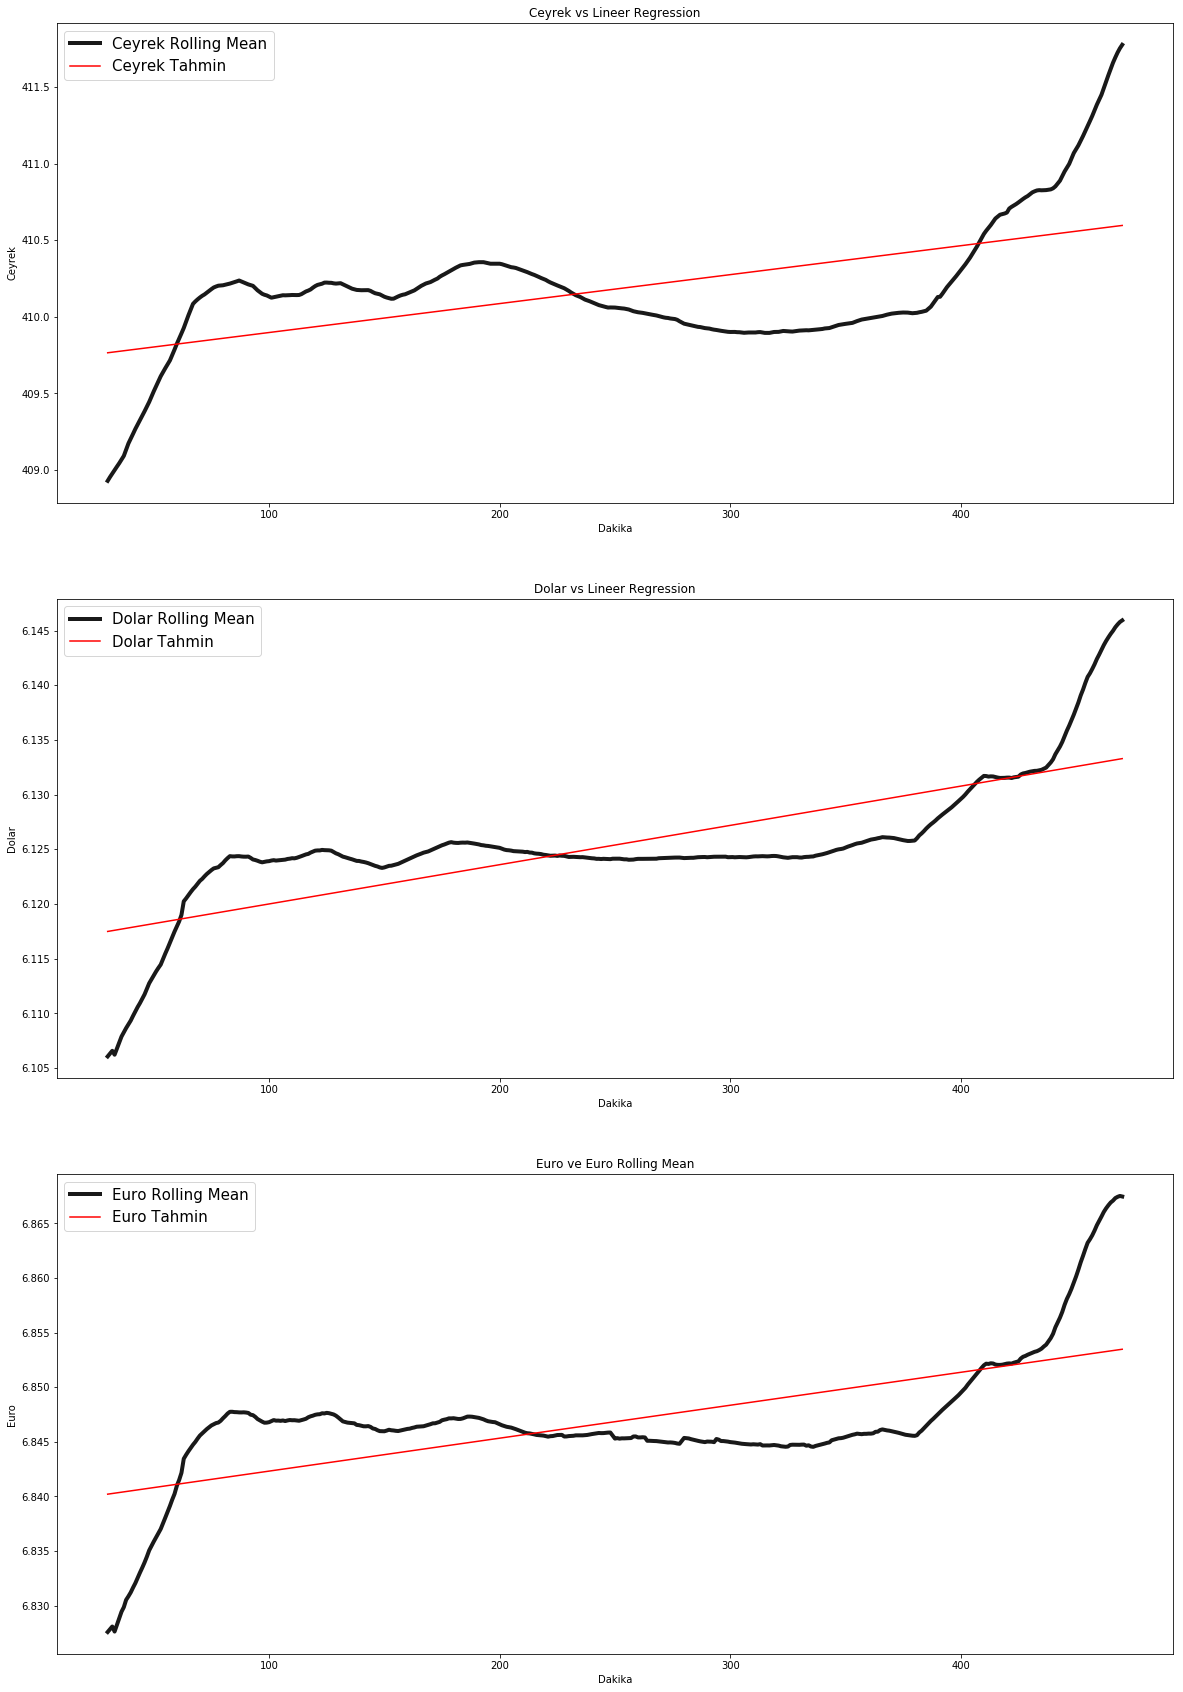

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,30));
axes[0].plot(joined_df['Dakika'], joined_df['Ceyrek_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Ceyrek Rolling Mean');
axes[0].plot(joined_df['Dakika'], joined_df['Ceyrek_Tahmin'], color = (1,0,0), label = 'Ceyrek Tahmin');
axes[0].set_title('Ceyrek vs Lineer Regression')
axes[0].set_xlabel('Dakika')
axes[0].set_ylabel('Ceyrek')
axes[0].legend(loc=2,fontsize=15);

axes[1].plot(joined_df['Dakika'], joined_df['Dolar_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Dolar Rolling Mean');
axes[1].plot(joined_df['Dakika'], joined_df['Dolar_Tahmin'], color = (1,0,0), label = 'Dolar Tahmin');
axes[1].set_title('Dolar vs Lineer Regression')
axes[1].set_xlabel('Dakika')
axes[1].set_ylabel('Dolar')
axes[1].legend(loc=2,fontsize=15);

axes[2].plot(joined_df['Dakika'], joined_df['Euro_Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Euro Rolling Mean');
axes[2].plot(joined_df['Dakika'], joined_df['Euro_Tahmin'], color = (1,0,0), label = 'Euro Tahmin');
axes[2].set_title('Euro ve Euro Rolling Mean')
axes[2].set_xlabel('Dakika')
axes[2].set_ylabel('Euro')
axes[2].legend(loc=2,fontsize=15);

In [23]:
import sklearn
r_squared = sklearn.metrics.r2_score(joined_df['Ceyrek_Rolling_Mean'],joined_df['Ceyrek_Tahmin'],multioutput='uniform_average')
print("Ceyrek Skor-->",r_squared)
r_squared = sklearn.metrics.r2_score(joined_df['Dolar_Rolling_Mean'],joined_df['Dolar_Tahmin'],multioutput='uniform_average')
print("Dolar Skor-->",r_squared)
r_squared = sklearn.metrics.r2_score(joined_df['Euro_Rolling_Mean'],joined_df['Euro_Tahmin'],multioutput='uniform_average')
print("Euro Skor-->",r_squared)

Ceyrek Skor--> 0.3144315564808279
Dolar Skor--> 0.5775333699295639
Euro Skor--> 0.41312625217822874


#### Polynomial Linear Regression 
Dokuman icin [tiklayin](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

In [44]:
import operator
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [49]:
def bestDegree(x,y):
    score = []
    for i in range(1,11):
        polynomial_features= PolynomialFeatures(degree=i)
        x_poly = polynomial_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        r2 = r2_score(y,y_poly_pred)
        score.append(r2)
    return score.index(max(score))+1

In [63]:
def polyRegression(yVal,isim):
    xVal = joined_df.Dakika.values
    x = xVal[:, np.newaxis]
    y = yVal[:, np.newaxis]
    degree = bestDegree(x,y)
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("{} rmse -->{}".format(isim,rmse))
    print("{} Max Score -->{} - Degree {}".format(isim,r2,degree))

    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    return y_poly_pred

In [64]:
def tahminleriGoster(x,y,tahminler,isimler):  
    fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,30));
    
    for i in range(3):
        axes[i].plot(x, y[i], color = (0,0,0), linewidth = 4, alpha = .9, label = '{} Rolling Mean'.format(isimler[i]));
        axes[i].plot(x, tahminler[i], color = (1,0,0), label = 'Tahmin');
        axes[i].set_title('{} Rolling Mean vs Polynomial Linear Regression'.format(isimler[i]),fontsize=20)
        axes[i].set_xlabel('Dakika',fontsize=20)
        axes[i].set_ylabel('{} Fiyat'.format(isimler[i]),fontsize=20)
        axes[i].grid(True)
        axes[i].legend(loc=2,fontsize=13);

Ceyrek rmse -->0.077800823679863
Ceyrek Max Score -->0.9670574034295998 - Degree 6
Dolar rmse -->0.0008965244963998812
Dolar Max Score -->0.977790396284016 - Degree 6
Euro rmse -->0.0009477205080387382
Euro Max Score -->0.974856097441172 - Degree 5


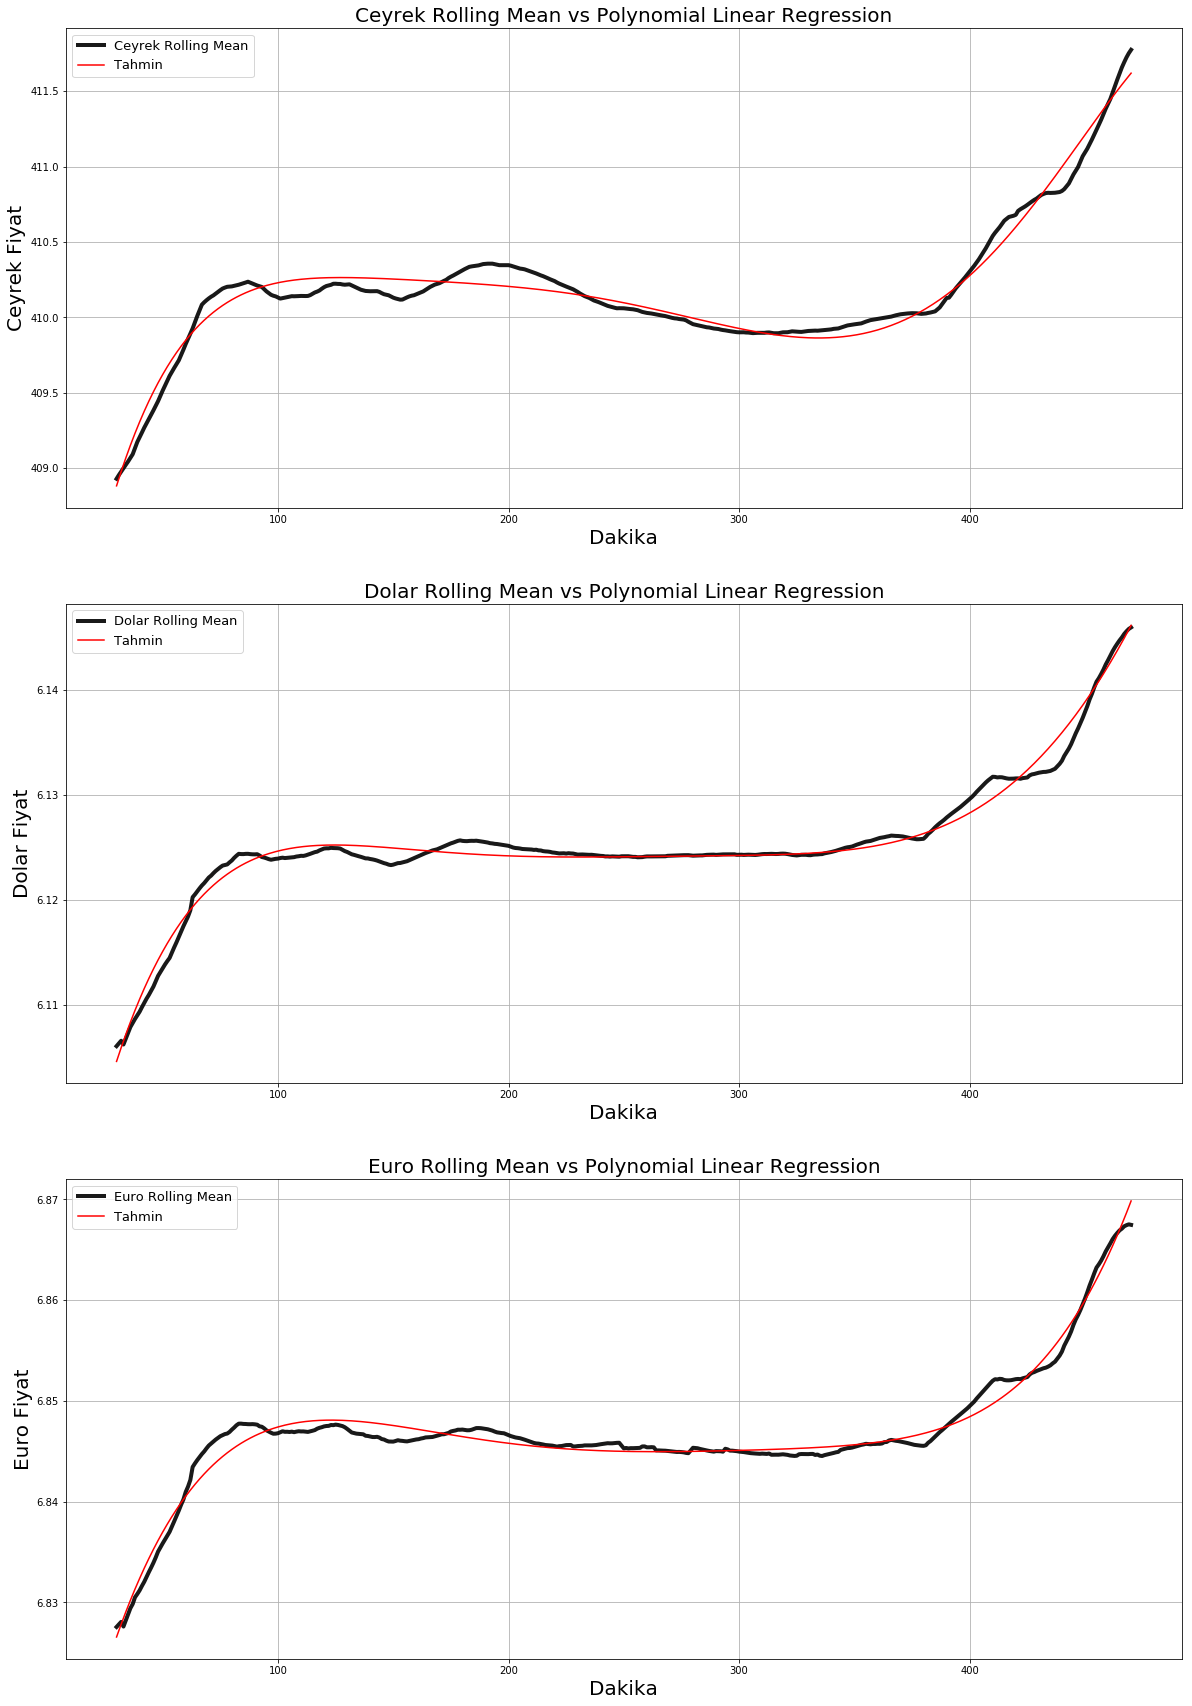

In [65]:
x = joined_df.Dakika.values
ceyrek = joined_df.Ceyrek_Rolling_Mean.values
dolar  = joined_df.Dolar_Rolling_Mean.values
euro   = joined_df.Euro_Rolling_Mean.values
yDegerleri = [ceyrek,dolar,euro]
tahminler = [polyRegression(ceyrek,"Ceyrek"),polyRegression(dolar,"Dolar"),polyRegression(euro,"Euro")]
isimler = ["Ceyrek","Dolar","Euro"]
tahminleriGoster(x,yDegerleri,tahminler,isimler)

In [61]:
print("Max Degre = ",score.index(max(score))+1)
print("Max Score = ",max(score))

Max Degre =  5
Max Score =  0.974856097441172
